In [32]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np


In [33]:
file_path = r"C:\Users\JITENDRA\Downloads\GWQ_2010-2018_01.xlsx"
df = pd.read_excel(file_path)
# Now you can work with the DataFrame `df` as needed
print(df.head(5))

            SITE_ID WRIS ID   LATITUDE  LONGITUDE SITE_TYPE  \
0  W115159092441001  W23881  11.866389  92.736111  Dug Well   
1               New  W38814  12.186944  92.791667  Dug Well   
2  W123014092513301  W24095  12.503889  92.859167  Dug Well   
3  W123129092581301  W24112  12.524722  92.970278  Dug Well   
4  W123030092573801  W24098  12.508333  92.960556  Dug Well   

            STATE_NAME  DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0  Andaman And Nicobar  A & N Islands      Ferrargunj    South Andaman   
1  Andaman And Nicobar  A & N Islands  Middle Andaman  Baratang Island   
2  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
3  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
4  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   

                  SITE_NAME  ... FLUORIDE  SAR  RSC   SiO2  PO4      TDS  \
0        Shoal  Bay– 15 No.  ...     0.37  NaN  NaN  13.97  NaN  217.748   
1  South Creek (Sunderga

In [34]:
new_df = df[['SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE', 'STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME', 'BASIN_NAME', 'PROJECT_NAME', 'year', 'FE']]
print(new_df.head(5))

            SITE_ID WRIS ID   LATITUDE  LONGITUDE SITE_TYPE  \
0  W115159092441001  W23881  11.866389  92.736111  Dug Well   
1               New  W38814  12.186944  92.791667  Dug Well   
2  W123014092513301  W24095  12.503889  92.859167  Dug Well   
3  W123129092581301  W24112  12.524722  92.970278  Dug Well   
4  W123030092573801  W24098  12.508333  92.960556  Dug Well   

            STATE_NAME  DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0  Andaman And Nicobar  A & N Islands      Ferrargunj    South Andaman   
1  Andaman And Nicobar  A & N Islands  Middle Andaman  Baratang Island   
2  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
3  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
4  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   

                  SITE_NAME            BASIN_NAME  \
0        Shoal  Bay– 15 No.         South_Andaman   
1  South Creek (Sundergarh)         South_Andaman   
2                

In [35]:
# Convert 'FE' column to numeric, setting non-numeric values to NaN
new_df['FE'] = pd.to_numeric(new_df['FE'], errors='coerce')

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_588\2749258819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FE'] = pd.to_numeric(new_df['FE'], errors='coerce')


In [36]:
# Display the modified DataFrame
print(new_df.head())
new_df.isnull().sum()  # count the number of missing values in each column

            SITE_ID WRIS ID   LATITUDE  LONGITUDE SITE_TYPE  \
0  W115159092441001  W23881  11.866389  92.736111  Dug Well   
1               New  W38814  12.186944  92.791667  Dug Well   
2  W123014092513301  W24095  12.503889  92.859167  Dug Well   
3  W123129092581301  W24112  12.524722  92.970278  Dug Well   
4  W123030092573801  W24098  12.508333  92.960556  Dug Well   

            STATE_NAME  DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0  Andaman And Nicobar  A & N Islands      Ferrargunj    South Andaman   
1  Andaman And Nicobar  A & N Islands  Middle Andaman  Baratang Island   
2  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
3  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
4  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   

                  SITE_NAME            BASIN_NAME  \
0        Shoal  Bay– 15 No.         South_Andaman   
1  South Creek (Sundergarh)         South_Andaman   
2                

SITE_ID              0
WRIS ID              0
LATITUDE           281
LONGITUDE          281
SITE_TYPE            0
STATE_NAME           0
DISTRICT_NAME        1
TAHSIL_NAME        112
BLOCK_NAME         126
SITE_NAME            0
BASIN_NAME           0
PROJECT_NAME         0
year                 0
FE               56660
dtype: int64

In [37]:
import re

def convert_coordinates(coord):
    if isinstance(coord, str):
        # Extract degrees, minutes, and seconds from the string
        degrees_minutes_seconds = re.findall(r"\d+\.\d+|\d+", coord)
        
        # Convert degrees, minutes, and seconds to decimal values
        decimal_coord = 0
        if len(degrees_minutes_seconds) > 0:
            decimal_coord += float(degrees_minutes_seconds[0])
        if len(degrees_minutes_seconds) > 1:
            decimal_coord += float(degrees_minutes_seconds[1]) / 60
        if len(degrees_minutes_seconds) > 2:
            decimal_coord += float(degrees_minutes_seconds[2]) / 3600
        
        return decimal_coord
    else:
        return coord

In [38]:
# Apply the convert_coordinates function to the LATITUDE and LONGITUDE columns
new_df['LATITUDE'] = new_df['LATITUDE'].apply(convert_coordinates)
new_df['LONGITUDE'] = new_df['LONGITUDE'].apply(convert_coordinates)

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_588\2379356289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LATITUDE'] = new_df['LATITUDE'].apply(convert_coordinates)
C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_588\2379356289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LONGITUDE'] = new_df['LONGITUDE'].apply(convert_coordinates)


In [39]:
# Drop duplicates
new_df = new_df.drop_duplicates()
new_df = new_df.dropna()  #removes rows from the DataFrame df that contain missing values (NaN) in any column.
new_df.shape

(28454, 14)

In [40]:
new_df = new_df[new_df['FE'] != 0]  # remove zero value in FE attributes
new_df = new_df[new_df['FE'] != 0.0]
# Remove rows with missing values in the 'FE' and 'SITE_TYPE' columns
new_df = new_df.dropna(subset=['FE', 'SITE_TYPE'])
new_df.shape

(17784, 14)

In [41]:
new_df['LATITUDE'] = pd.to_numeric(new_df['LATITUDE'], errors='coerce')
new_df['LONGITUDE'] = pd.to_numeric(new_df['LONGITUDE'], errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17784 entries, 0 to 85132
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        17784 non-null  object 
 1   WRIS ID        17784 non-null  object 
 2   LATITUDE       17784 non-null  float64
 3   LONGITUDE      17784 non-null  float64
 4   SITE_TYPE      17784 non-null  object 
 5   STATE_NAME     17784 non-null  object 
 6   DISTRICT_NAME  17784 non-null  object 
 7   TAHSIL_NAME    17784 non-null  object 
 8   BLOCK_NAME     17784 non-null  object 
 9   SITE_NAME      17784 non-null  object 
 10  BASIN_NAME     17784 non-null  object 
 11  PROJECT_NAME   17784 non-null  object 
 12  year           17784 non-null  int64  
 13  FE             17784 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.0+ MB


In [46]:
new_df2014 = new_df[new_df['year'] == 2014][['SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE', 'STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME', 'BASIN_NAME', 'PROJECT_NAME', 'year', 'FE']].copy()
new_df2014.shape


(976, 14)

In [47]:
# Assuming you have a DataFrame named new_df2014
# Select 'FE' and 'year' columns
selected_columns = ['FE']
selected_df = new_df2014[selected_columns]

# Display descriptive statistics for selected columns
print(selected_df.describe())


               FE
count  976.000000
mean     0.784401
std      1.545625
min      0.001000
25%      0.100000
50%      0.260000
75%      0.850000
max     15.500000


In [14]:
# Assuming you have already loaded and processed the dataset

# Check the range of EC values
FE_range2018 = new_df2018['FE'].describe()[['min', 'max']]
print(FE_range2018)

min     0.001
max    22.100
Name: FE, dtype: float64


Here iron content in water is defined below:- FE=0.3 PPM ( Acceptable limit), it is drinkable water FE=1 PPM(Permissible limit), it is direct not drinkable but some purificatin is required. FE>1 it is no use for any purpose



In [15]:
# Define the bin edges for the clusters
bin_edges = [float('-inf'), 0.3, 1, float('inf')]

# Define the cluster labels
cluster_labels = ['cluster1', 'cluster2', 'cluster3']

# Create a new column 'EC Cluster' with the cluster labels
new_df2018['FE_Cluster'] = pd.cut(new_df['FE'], bins=bin_edges, labels=cluster_labels, right=False)

# Print the DataFrame with the 'LATITUDE', 'LONGITUDE', and 'PH Cluster' columns
print(new_df2018[['LATITUDE', 'LONGITUDE', 'FE_Cluster']])

# Print EC cluster vs count
cluster_counts = new_df2018['FE_Cluster'].value_counts()
print(cluster_counts)

        LATITUDE  LONGITUDE FE_Cluster
0      11.866389  92.736111   cluster3
1      12.186944  92.791667   cluster1
2      12.503889  92.859167   cluster1
3      12.524722  92.970278   cluster1
4      12.508333  92.960556   cluster1
...          ...        ...        ...
76161  23.971778  91.372778   cluster1
76172  23.796661  91.281881   cluster1
76175  24.045278  91.399167   cluster1
76176  23.882480  91.332462   cluster1
76181  24.092222  91.393333   cluster1

[2145 rows x 3 columns]
cluster1    1247
cluster2     690
cluster3     208
Name: FE_Cluster, dtype: int64


In [16]:
# Assuming you already have the data in a DataFrame called 'df'

# Convert latitude and longitude columns to numeric values
new_df2018['LATITUDE'] = pd.to_numeric(new_df2018['LATITUDE'])
new_df2018['LONGITUDE'] = pd.to_numeric(new_df2018['LONGITUDE'])

# Create a GeoDataFrame using latitude and longitude coordinates
gdf = gpd.GeoDataFrame(new_df2018, geometry=gpd.points_from_xy(new_df2018['LONGITUDE'], new_df2018['LATITUDE']))
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
states_data.head(5)

,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."


In [17]:
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')
districts_data.head(5)

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_11208\2812850670.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))


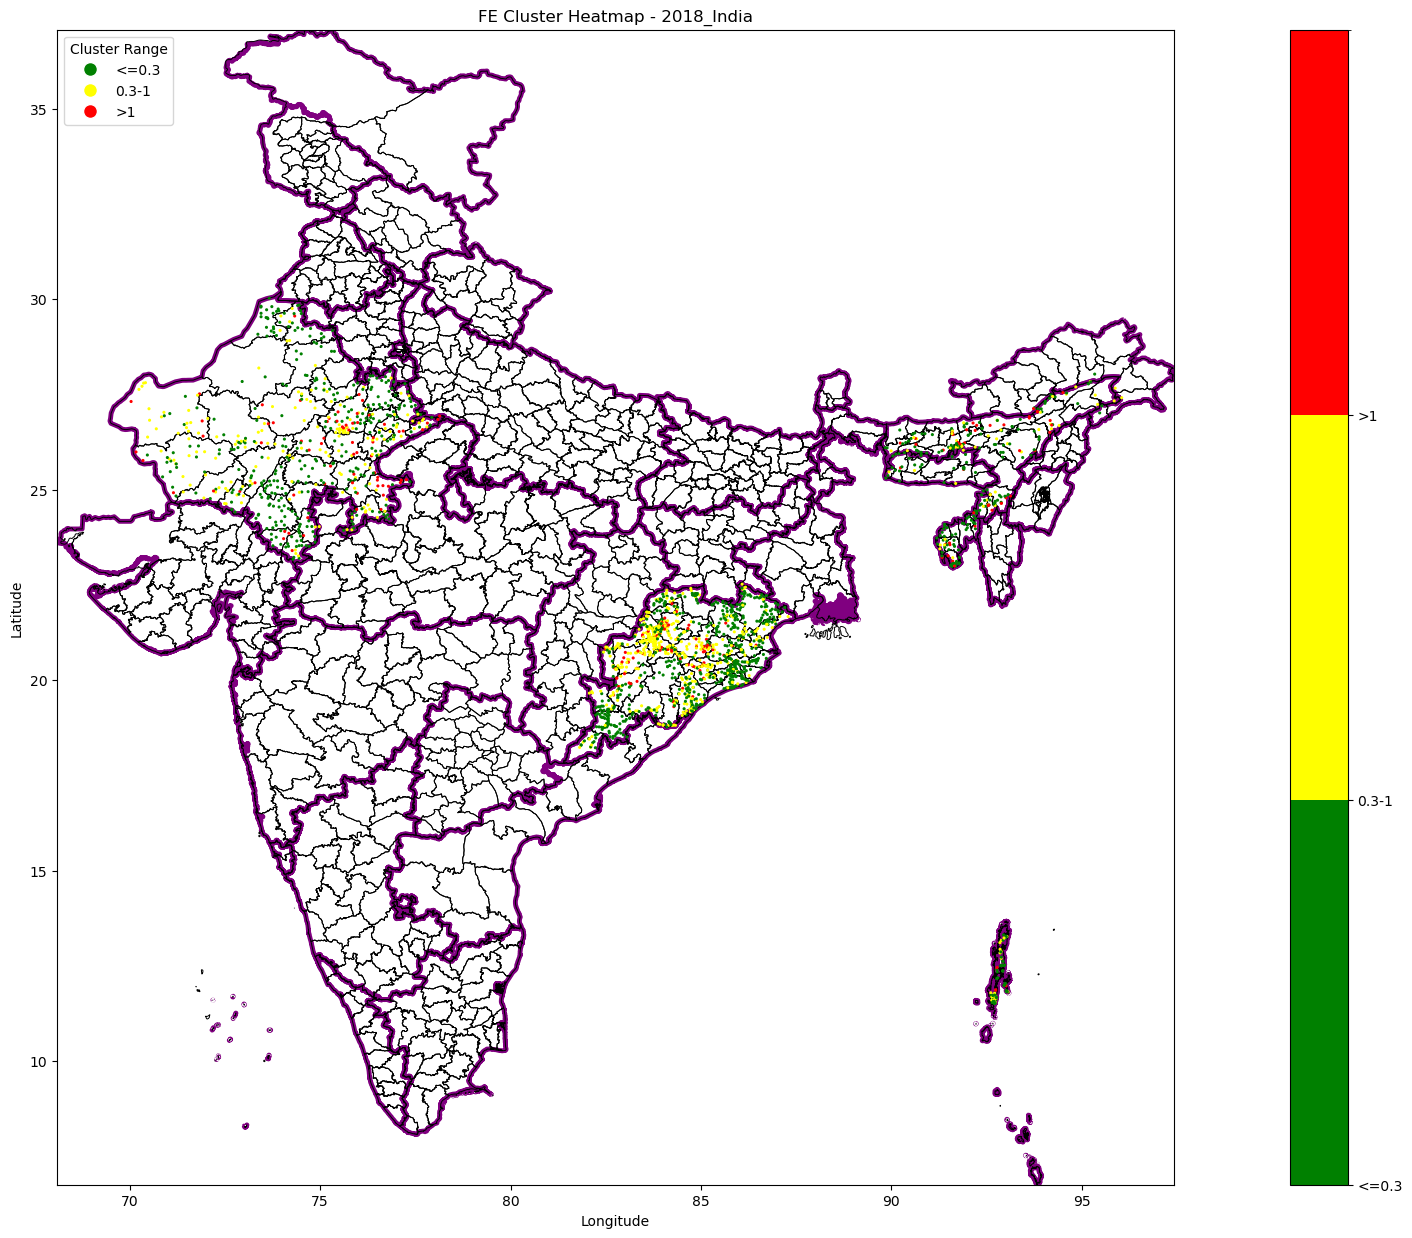

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 15))

# Define the cluster ranges and corresponding colors
cluster_ranges = ['<=0.3', '0.3-1', '>1']
cluster_colors = ['green', 'yellow', 'red']

# Create a color map for the clusters
color_map = mcolors.ListedColormap(cluster_colors)
color_boundaries = [i for i in range(len(cluster_ranges) + 1)]
color_norm = mcolors.BoundaryNorm(color_boundaries, len(cluster_ranges))

# Read the districts data
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Plotting the map with state boundaries
states_data.plot(ax=ax, edgecolor='purple', linewidth=3.5, facecolor='none')

# Plotting the district boundaries on top of the state boundaries
districts_data.plot(ax=ax, edgecolor='black', linewidth=0.7, facecolor='none')

# Plot the TDS heatmap with the specified color map
gdf.plot(column='FE_Cluster', cmap=color_map, markersize=5, legend=True, ax=ax, norm=color_norm, edgecolor='none')

# Set plot title and axis labels
plt.title('FE Cluster Heatmap - 2018_India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust axis limits
ax.set_xlim(states_data.total_bounds[0], states_data.total_bounds[2])
ax.set_ylim(states_data.total_bounds[1], states_data.total_bounds[3])

# Create a legend with cluster ranges and colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=range_) for
                   range_, color in zip(cluster_ranges, cluster_colors)]
ax.legend(handles=legend_elements, title='Cluster Range', loc='upper left')

# Create a dummy mappable for the colorbar
dummy_cmap = cm.ScalarMappable(cmap=color_map, norm=color_norm)
dummy_cmap.set_array([])

# Add color bar
cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))
cbar.set_ticklabels(cluster_ranges)

# Save the plot as a PNG image with high quality
plt.savefig('heatmap_FE_2018.png', dpi=300)
# Show the plot
plt.show()

In [18]:
cluster3_df = new_df2018[new_df2018['FE_Cluster'] == 'cluster3'][['STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME']]
print(cluster3_df)

                STATE_NAME  DISTRICT_NAME     TAHSIL_NAME      BLOCK_NAME
0      Andaman And Nicobar  A & N Islands      Ferrargunj   South Andaman
14     Andaman And Nicobar  A & N Islands  Middle Andaman  Middle Andaman
19     Andaman And Nicobar  A & N Islands  Middle Andaman          Ronget
33     Andaman And Nicobar  A & N Islands   South Andaman      Ferrargunj
45     Andaman And Nicobar  A & N Islands   South Andaman      Ferrargunj
...                    ...            ...             ...             ...
76074              Tripura  South Tripura       Panisagar       Panisagar
76084              Tripura  South Tripura        Rajnagar        Rajnagar
76092              Tripura  South Tripura        Rajnagar        Rajnagar
76115              Tripura  South Tripura        Satchand        Satchand
76118              Tripura  South Tripura        Satchand        Satchand

[208 rows x 4 columns]


In [19]:
# Print STATE_NAME with unique combinations of DISTRICT_NAME, BLOCK_NAME, TAHSIL_NAME and their counts
print("\nSTATE_NAME with unique combinations of DISTRICT_NAME, TAHSIL_NAME, BLOCK_NAME and their counts:")
state_counts = cluster3_df['STATE_NAME'].value_counts()
for state, count in state_counts.items():
    highlighted_state = f"\033[1m{state}\033[0m"  # Add bold formatting to STATE_NAME
    print(f"{highlighted_state}: Count: {count}")

    district_counts = cluster3_df[cluster3_df['STATE_NAME'] == state]['DISTRICT_NAME'].value_counts()
    for district, district_count in district_counts.items():
        highlighted_district = f"\033[94m{district}\033[0m"  # Highlight DISTRICT_NAME
        print(f"  DISTRICT_NAME: {highlighted_district}, Count: {district_count}")

        tahsil_counts = cluster3_df[(cluster3_df['STATE_NAME'] == state) & (cluster3_df['DISTRICT_NAME'] == district)]['TAHSIL_NAME'].value_counts()
        for tahsil, tahsil_count in tahsil_counts.items():
            highlighted_tahsil = f"\033[92m{tahsil}\033[0m"  # Highlight TAHSIL_NAME
            print(f"    TAHSIL_NAME: {highlighted_tahsil}, Count: {tahsil_count}")

            block_counts = cluster3_df[(cluster3_df['STATE_NAME'] == state) & (cluster3_df['DISTRICT_NAME'] == district) & (cluster3_df['TAHSIL_NAME'] == tahsil)]['BLOCK_NAME'].value_counts()
            for block, block_count in block_counts.items():
                highlighted_block = f"\033[93m{block}\033[0m"  # Highlight BLOCK_NAME
                print(f"      BLOCK_NAME: {highlighted_block}, Count: {block_count}")


STATE_NAME with unique combinations of DISTRICT_NAME, TAHSIL_NAME, BLOCK_NAME and their counts:
Odisha: Count: 81
  DISTRICT_NAME: Sambalpur, Count: 13
    TAHSIL_NAME: Maneswar, Count: 5
      BLOCK_NAME: Maneswar, Count: 5
    TAHSIL_NAME: Dhankauda, Count: 4
      BLOCK_NAME: Dhankauda, Count: 4
    TAHSIL_NAME: Jujomura, Count: 2
      BLOCK_NAME: Jujomura, Count: 2
    TAHSIL_NAME: Kochinda, Count: 1
      BLOCK_NAME: Kochinda, Count: 1
    TAHSIL_NAME: Rairakhol, Count: 1
      BLOCK_NAME: Rairakhol, Count: 1
  DISTRICT_NAME: Anugul, Count: 11
    TAHSIL_NAME: Anugul, Count: 3
      BLOCK_NAME: Angul, Count: 3
    TAHSIL_NAME: Banarpal, Count: 3
      BLOCK_NAME: Banarpal, Count: 3
    TAHSIL_NAME: Chhendipada, Count: 2
      BLOCK_NAME: Chhendipada, Count: 2
    TAHSIL_NAME: Talacher, Count: 2
      BLOCK_NAME: Talacher, Count: 2
    TAHSIL_NAME: Kaniha, Count: 1
      BLOCK_NAME: Kaniha, Count: 1
  DISTRICT_NAME: Kalahandi, Count: 8
    TAHSIL_NAME: Bhawanipatna, Count: 3
    

    TAHSIL_NAME: Keshoraipatan, Count: 1
      BLOCK_NAME: Keshorai Patan, Count: 1
  DISTRICT_NAME: Chittaurgarh, Count: 1
    TAHSIL_NAME: Kapasan, Count: 1
      BLOCK_NAME: Kapasan, Count: 1
  DISTRICT_NAME: Jalore, Count: 1
    TAHSIL_NAME: Raniwara, Count: 1
      BLOCK_NAME: Raniwara, Count: 1
  DISTRICT_NAME: Banswara, Count: 1
    TAHSIL_NAME: Bagidora, Count: 1
      BLOCK_NAME: Bagidora, Count: 1
  DISTRICT_NAME: Hanumangarh, Count: 1
    TAHSIL_NAME: Hanumangarh, Count: 1
      BLOCK_NAME: Hanumangarh, Count: 1
  DISTRICT_NAME: Dausa, Count: 1
    TAHSIL_NAME: Dausa, Count: 1
      BLOCK_NAME: Sam, Count: 1
  DISTRICT_NAME: Jhalawar, Count: 1
    TAHSIL_NAME: Jhalra Patan, Count: 1
      BLOCK_NAME: Jhalra Patan, Count: 1
Assam: Count: 34
  DISTRICT_NAME: Kamrup, Count: 9
    TAHSIL_NAME: Algapur, Count: 1
      BLOCK_NAME: Damcherra, Count: 1
    TAHSIL_NAME: Azara, Count: 1
      BLOCK_NAME: Sonapur, Count: 1
    TAHSIL_NAME: Chhaygaon, Count: 1
      BLOCK_NAME: Chamaria

In [20]:
# Print STATE_NAME with unique combinations of DISTRICT_NAME, BLOCK_NAME, TAHSIL_NAME
print("\nSTATE_NAME with unique combinations of DISTRICT_NAME, TAHSIL_NAME, BLOCK_NAME:")
state_group = cluster3_df.groupby('STATE_NAME')
for state, group in state_group:
    districts = ', '.join(group['DISTRICT_NAME'].unique())
    blocks = ', '.join(group['BLOCK_NAME'].unique())
    tahsils = ', '.join(group['TAHSIL_NAME'].unique())
    highlighted_state = f"\033[1m{state}\033[0m"  # Add bold formatting to STATE_NAME
    highlighted_districts = ', '.join([f"\033[94m{district}\033[0m" for district in group['DISTRICT_NAME'].unique()])  # Highlight DISTRICT_NAME
    highlighted_blocks = ', '.join([f"\033[92m{block}\033[0m" for block in group['BLOCK_NAME'].unique()])  # Highlight BLOCK_NAME
    highlighted_tahsils = ', '.join([f"\033[93m{tahsil}\033[0m" for tahsil in group['TAHSIL_NAME'].unique()])  # Highlight TAHSIL_NAME
    print(f"{highlighted_state}: DISTRICT_NAME: {highlighted_districts}, BLOCK_NAME: {highlighted_blocks}, TAHSIL_NAME: {highlighted_tahsils}")


STATE_NAME with unique combinations of DISTRICT_NAME, TAHSIL_NAME, BLOCK_NAME:
Andaman And Nicobar: DISTRICT_NAME: A & N Islands, BLOCK_NAME: South Andaman, Middle Andaman, Ronget, Ferrargunj, Port Blair, TAHSIL_NAME: Ferrargunj, Middle Andaman, South Andaman
Arunachal Pradesh: DISTRICT_NAME: Papumpare, BLOCK_NAME: Sagalee, TAHSIL_NAME: Naharlagun
Assam: DISTRICT_NAME: Biswanath, Bongaigaon, Cachar, Darrang, Dhemaji, Dhubri, Hailakandi, Jorhat, Kamrup, Karbi Anglong, Karimganj, Lakhimpur, Sonitpur, Udalguri, BLOCK_NAME: Gohpur, Dhekiajuli, Srijangram, Sonai, Dalgaon, Harisinga, Subansiri, Bilasipara, Katlichera, Damcherra, Jorhat East, Jorhat West, Sonapur, Chamaria, Dispur, Hajo, North Guwahati, Rangia, Mangaldoi, Silonijan, Bihpuria, Narayanpur, Pathorighat, TAHSIL_NAME: Gohpur, Na-Duar, Srijangram, Lakhipur, Sonai, Dalgaon, Udalguri, Dhemaji, Bilasipara, Katlichera, Lala, Jorhat West, Titabor, Algapur, Azara, Chhaygaon, Dispur, Hajo, North Guwahati, Rangia, Rangia (Pt), Sipajhar, D

In [21]:
# Print STATE_NAME with unique combinations of DISTRICT_NAME, BLOCK_NAME, TAHSIL_NAME and their counts
print("\nSTATE_NAME with unique combinations of DISTRICT_NAME, TAHSIL_NAME, BLOCK_NAME and their counts:")
state_counts = cluster3_df['STATE_NAME'].value_counts()
for state, count in state_counts.items():
    highlighted_state = f"\033[1m{state}: Count: {count}\033[0m"  # Add bold formatting to STATE_NAME and count
    print(highlighted_state)

    district_counts = cluster3_df[cluster3_df['STATE_NAME'] == state]['DISTRICT_NAME'].value_counts()
    for district, district_count in district_counts.items():
        highlighted_district = f"\033[94m{district}: Count: {district_count}\033[0m"  # Highlight DISTRICT_NAME and count
        print(f"  {highlighted_district}")

        tahsil_counts = cluster3_df[(cluster3_df['STATE_NAME'] == state) & (cluster3_df['DISTRICT_NAME'] == district)]['TAHSIL_NAME'].value_counts()
        for tahsil, tahsil_count in tahsil_counts.items():
            highlighted_tahsil = f"\033[92m{tahsil}: Count: {tahsil_count}\033[0m"  # Highlight TAHSIL_NAME and count
            print(f"    {highlighted_tahsil}")

            block_counts = cluster3_df[(cluster3_df['STATE_NAME'] == state) & (cluster3_df['DISTRICT_NAME'] == district) & (cluster3_df['TAHSIL_NAME'] == tahsil)]['BLOCK_NAME'].value_counts()
            for block, block_count in block_counts.items():
                highlighted_block = f"\033[93m{block}: Count: {block_count}\033[0m"  # Highlight BLOCK_NAME and count
                print(f"      {highlighted_block}")


STATE_NAME with unique combinations of DISTRICT_NAME, TAHSIL_NAME, BLOCK_NAME and their counts:
Odisha: Count: 81
  Sambalpur: Count: 13
    Maneswar: Count: 5
      Maneswar: Count: 5
    Dhankauda: Count: 4
      Dhankauda: Count: 4
    Jujomura: Count: 2
      Jujomura: Count: 2
    Kochinda: Count: 1
      Kochinda: Count: 1
    Rairakhol: Count: 1
      Rairakhol: Count: 1
  Anugul: Count: 11
    Anugul: Count: 3
      Angul: Count: 3
    Banarpal: Count: 3
      Banarpal: Count: 3
    Chhendipada: Count: 2
      Chhendipada: Count: 2
    Talacher: Count: 2
      Talacher: Count: 2
    Kaniha: Count: 1
      Kaniha: Count: 1
  Kalahandi: Count: 8
    Bhawanipatna: Count: 3
      Bhawanipatna: Count: 3
    Golamunda: Count: 2
      Golamunda: Count: 2
    Jayapatna: Count: 1
      Madanpur    Rampur: Count: 1
    Junagarh: Count: 1
      Junagarh: Count: 1
    Narala: Count: 1
      Narala: Count: 1
  Balangir: Count: 8
    Balangir: Count: 1
      Bolangir: Count: 1
    Belpara: 

      Katlichera: Count: 1
    Lala: Count: 1
      Damcherra: Count: 1
  Karbi Anglong: Count: 2
    Diphu: Count: 1
      Silonijan: Count: 1
    Phuloni: Count: 1
      Silonijan: Count: 1
  Lakhimpur: Count: 2
    Narayanpur: Count: 2
      Bihpuria: Count: 1
      Narayanpur: Count: 1
  Sonitpur: Count: 2
    Dhekiajuli (Pt): Count: 1
      Dhekiajuli: Count: 1
    Gohpur: Count: 1
      Dhekiajuli: Count: 1
  Udalguri: Count: 2
    Mazbat: Count: 1
      Harisinga: Count: 1
    Pathorighat: Count: 1
      Pathorighat: Count: 1
  Bongaigaon: Count: 1
    Srijangram: Count: 1
      Srijangram: Count: 1
  Dhemaji: Count: 1
    Dhemaji: Count: 1
      Subansiri: Count: 1
  Dhubri: Count: 1
    Bilasipara: Count: 1
      Bilasipara: Count: 1
  Karimganj: Count: 1
    Lala: Count: 1
      Damcherra: Count: 1
Tripura: Count: 10
  South Tripura: Count: 5
    Rajnagar: Count: 2
      Rajnagar: Count: 2
    Satchand: Count: 2
      Satchand: Count: 2
    Panisagar: Count: 1
      Panisagar

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_588\2105966588.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map


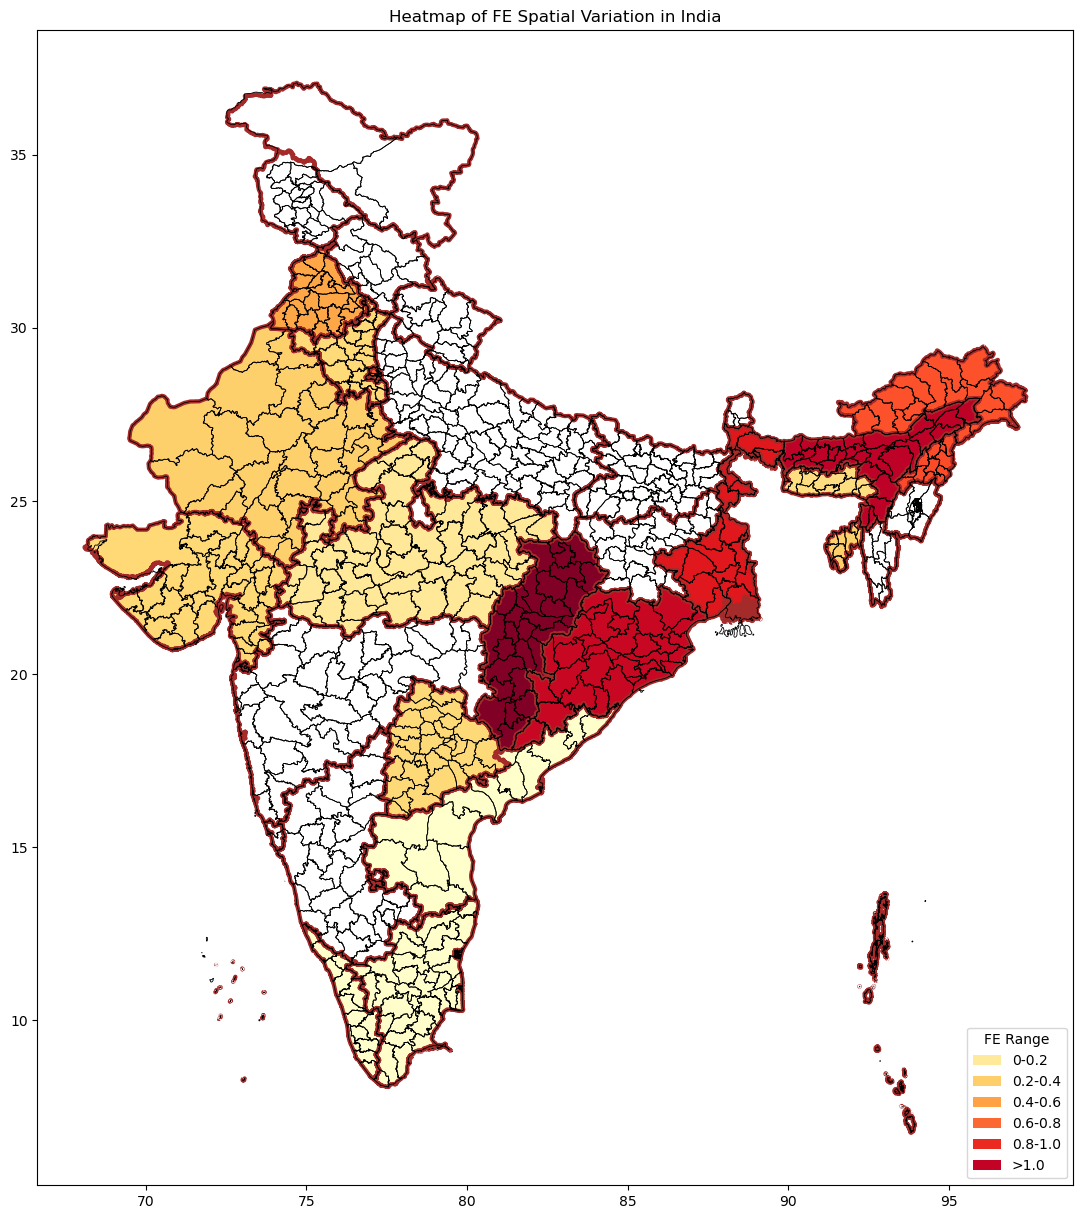

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the shapefiles for India's states and districts
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Process and filter the new_df DataFrame as needed
# ...

# Group the data by state and calculate the mean FE value for each state
state_mean_fe = new_df.groupby('STATE_NAME')['FE'].mean().reset_index()

# Merge the calculated mean FE values with the states' geometry from the states_data GeoDataFrame
merged_data = states_data.merge(state_mean_fe, left_on='ST_NM', right_on='STATE_NAME')

# Define the color scale for the legend
color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map
legend_ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), (1.0, float('inf'))]  # Define 'FE' ranges
legend_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '>1.0']  # Define legend labels

# Plot the choropleth map of the mean FE values at the state level
fig, ax = plt.subplots(figsize=(30, 15))
merged_data.plot(column='FE', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
states_data.boundary.plot(ax=ax, linewidth=3.0, color='brown')  # Plot state boundaries
districts_data.boundary.plot(ax=ax, linewidth=0.6, color='black')  # Plot district boundaries

# Add a legend with color scale representing the 'FE' ranges
legend_elements = []
for i, (range_min, range_max) in enumerate(legend_ranges):
    legend_elements.append(Patch(facecolor=color_scale((i + 1) / (len(legend_ranges) + 1)), label=legend_labels[i]))
ax.legend(handles=legend_elements, title='FE Range', loc='lower right')

ax.set_title('Heatmap of FE Spatial Variation in India')
plt.show()


C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_588\675993975.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map


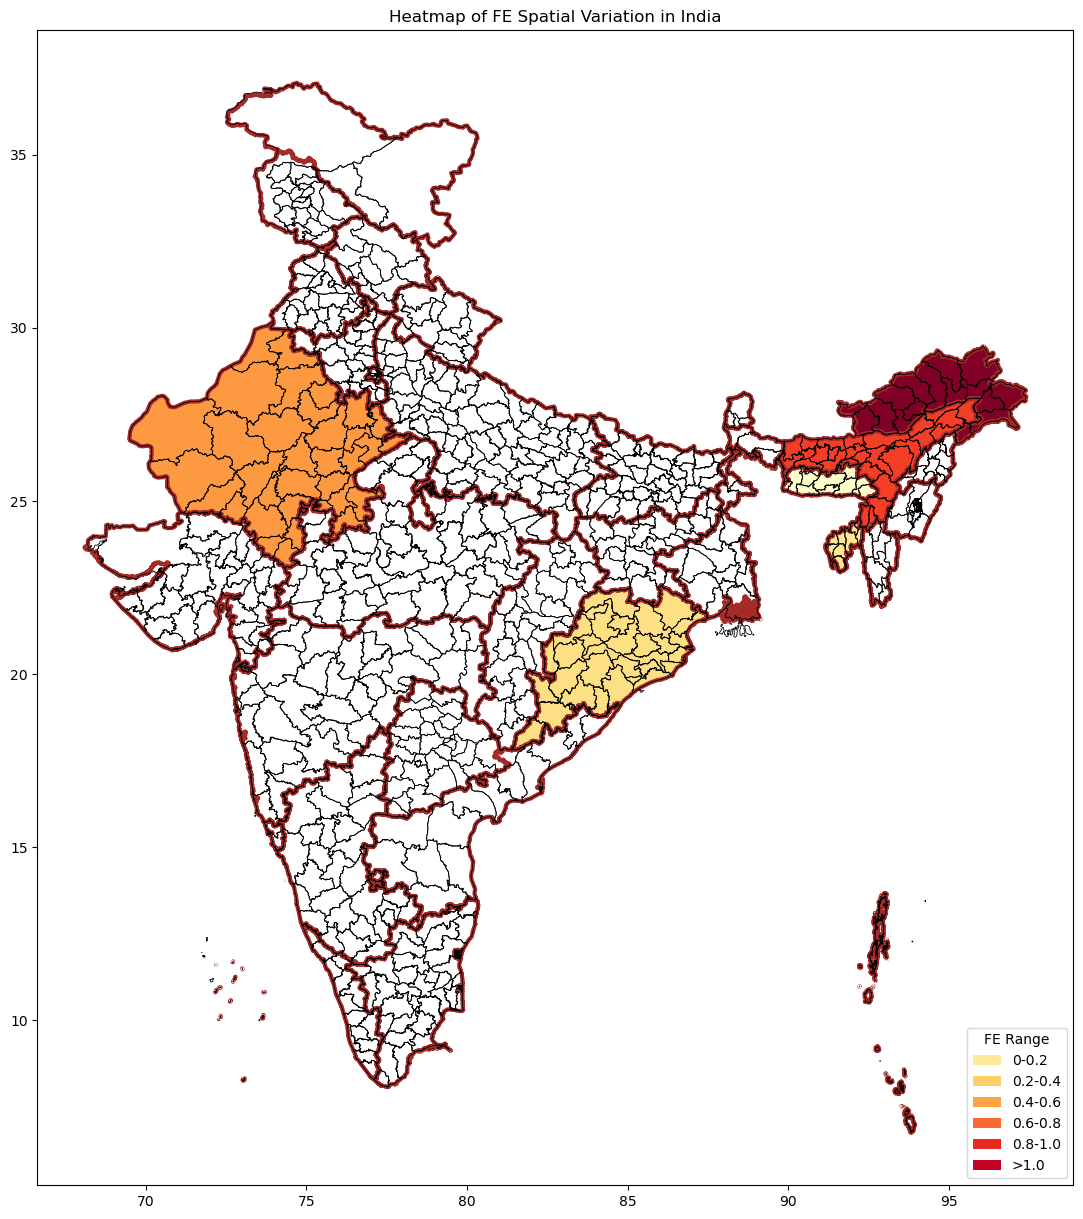

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the shapefiles for India's states and districts
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Process and filter the new_df DataFrame as needed
# ...

# Group the data by state and calculate the mean FE value for each state
state_mean_fe = new_df2018.groupby('STATE_NAME')['FE'].mean().reset_index()

# Merge the calculated mean FE values with the states' geometry from the states_data GeoDataFrame
merged_data = states_data.merge(state_mean_fe, left_on='ST_NM', right_on='STATE_NAME')

# Define the color scale for the legend
color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map
legend_ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), (1.0, float('inf'))]  # Define 'FE' ranges
legend_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '>1.0']  # Define legend labels

# Plot the choropleth map of the mean FE values at the state level
fig, ax = plt.subplots(figsize=(30, 15))
merged_data.plot(column='FE', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
states_data.boundary.plot(ax=ax, linewidth=3.0, color='brown')  # Plot state boundaries
districts_data.boundary.plot(ax=ax, linewidth=0.6, color='black')  # Plot district boundaries

# Add a legend with color scale representing the 'FE' ranges
legend_elements = []
for i, (range_min, range_max) in enumerate(legend_ranges):
    legend_elements.append(Patch(facecolor=color_scale((i + 1) / (len(legend_ranges) + 1)), label=legend_labels[i]))
ax.legend(handles=legend_elements, title='FE Range', loc='lower right')

ax.set_title('Heatmap of FE Spatial Variation in India')
plt.show()


In [22]:
new_df2018_08 = new_df[(new_df['year'] == 2018) & (new_df['STATE_NAME'] == 'Rajasthan')][['SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE', 'STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME', 'BASIN_NAME', 'PROJECT_NAME', 'year', 'FE']].copy()
new_df2018_08.shape


(589, 14)